In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading Csv File
df=pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#checking null values presnt in dataset
df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
#creating Feature matrix In our case Annual Income and Spending Score
X=df.iloc[:,[2,3]].values
X#taking some part of the data for representation

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

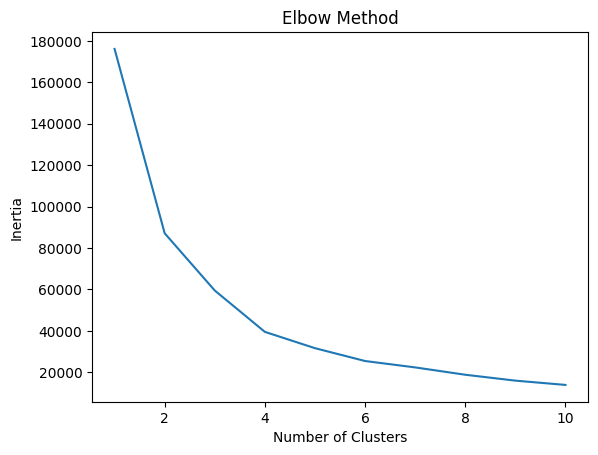

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X is your data
elbow_points = []
for i in range(1, 11):
    k = KMeans(n_clusters=i, init='k-means++', random_state=0)
    k.fit(X)
    elbow_points.append(k.inertia_)

plt.plot(range(1, 11), elbow_points)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#Divinding dataPoints into Clusters
k=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=k.fit_predict(X)
y_kmeans


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

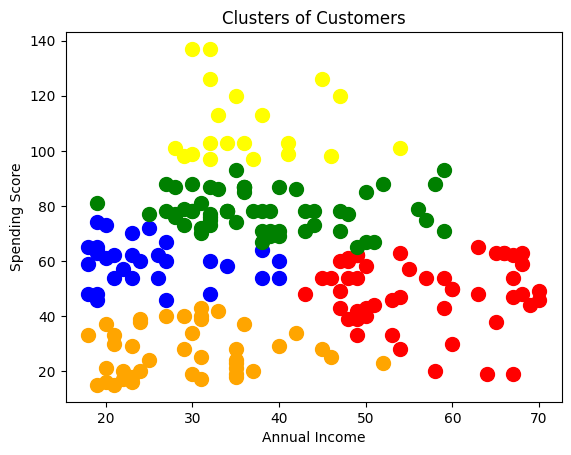

In [ ]:
#Scatter plot After CLustering
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster 2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='orange',label='Cluster 3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=100,c='yellow',label='Cluster 5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

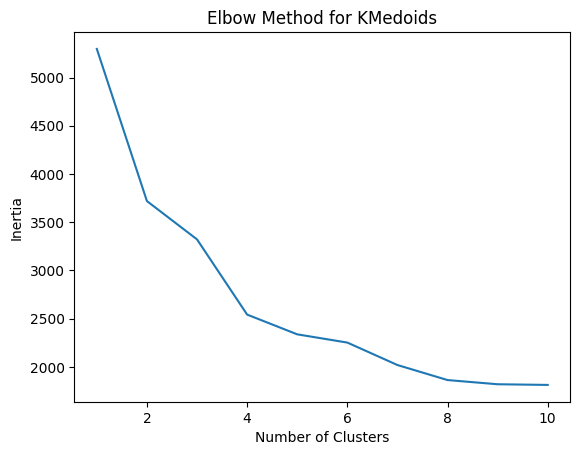

In [ ]:
# Install scikit-learn-extra (if not installed)
!pip install scikit-learn-extra

from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

elbow_points = []
for i in range(1, 11):
    kmedoids = KMedoids(n_clusters=i, random_state=0)
    kmedoids.fit(X)
    elbow_points.append(kmedoids.inertia_)

plt.plot(range(1, 11), elbow_points)
plt.title('Elbow Method for KMedoids')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
kmedoids = KMedoids(n_clusters=5, random_state=0)
y_kmedoids = kmedoids.fit_predict(X)
y_kmedoids

array([4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1,
       2, 3, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3, 3,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

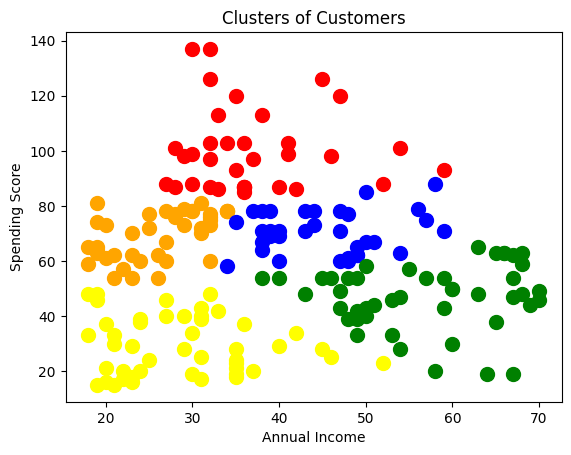

In [ ]:
#Clustring Based on K-Medoids
plt.scatter(X[y_kmedoids==0,0],X[y_kmedoids==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(X[y_kmedoids==1,0],X[y_kmedoids==1,1],s=100,c='orange',label='Cluster 2')
plt.scatter(X[y_kmedoids==2,0],X[y_kmedoids==2,1],s=100,c='blue',label='Cluster 3')
plt.scatter(X[y_kmedoids==3,0],X[y_kmedoids==3,1],s=100,c='green',label='Cluster 4')
plt.scatter(X[y_kmedoids==4,0],X[y_kmedoids==4,1],s=100,c='yellow',label='Cluster 5')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()